In [29]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk import word_tokenize
from nltk.util import ngrams
import re
import regex

In [45]:
from nltk.corpus import stopwords

In [30]:
df = pd.read_csv('gazprom.csv')

In [89]:
df.head()

,date,text,miller
0,09.11.2017,компания рассчитывает решение газовому спору у...,0
1,08.11.2017,предполагал ъ газпром воспользовавшись жалобам...,0
2,01.11.2017,новая редакция американских санкций ставит угр...,0
3,30.10.2017,стало известно ъ известный рынке риск менеджер...,0
4,23.10.2017,новатэк который пять лет собирается запустить ...,0


In [44]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [46]:
def words_only(text):
    try:
        tmp = re.sub(r'\W+', ' ', text)
        tmp = regex.sub(u'[\p{Latin}]', u'', tmp)
        return ' '.join(tmp.split())
    except:
        return ""

mystopwords = stopwords.words('russian') + ['это', 'наш' , 'тыс', 'млн', 'млрд', 'также',  'т', 'д']

def  remove_stopwords(text, mystopwords = mystopwords):
    try:
        return " ".join([token for token in text.split() if not token in mystopwords])
    except:
        return ""

In [47]:
df.text = df.text.str.lower()
df.text = df.text.apply(words_only)
df.text = df.text.apply(remove_stopwords)

In [49]:
n_types = []
n_tokens = []
tokens = []
cnt = Counter()

for index, row in df.iterrows():
    tokens = row['text'].split()
    cnt.update(tokens)
    n_types.append(len(cnt))
    n_tokens.append(sum(cnt.values()))
    
for i in cnt.most_common(10):
    print(i)

('газпром', 2734)
('газа', 962)
('компании', 711)
('руб', 596)
('газпрома', 556)
('г', 496)
('нефть', 451)
('компания', 400)
('нефти', 357)
('года', 329)


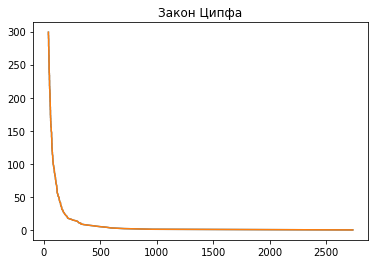

In [106]:
freqs = list(cnt.values())
freqs = sorted(freqs, reverse = True)

plt.plot(freqs[:300], range(300))
plt.title('Закон Ципфа')
plt.show()

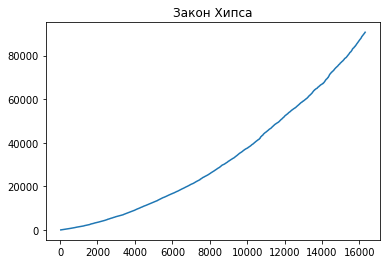

In [107]:
plt.title('Закон Хипса')
plt.plot(n_types, n_tokens)
plt.show()

Есть ли корреляция между средней длинной текста за день и ценой закрытия?

In [91]:
def len1(x):
    return len(x)

In [92]:
df['len'] = df.text.apply(len1)

In [93]:
df1 = df.groupby('date').mean()

In [94]:
df1.head(10)

,len
date,
01.02.2010,256
01.02.2011,586
01.02.2012,857
01.02.2013,171
01.02.2016,1224
01.02.2017,972
01.03.2012,983
01.03.2017,1167
01.04.2014,1398


In [91]:
df2 = pd.read_csv('gazprom_prices.csv', sep=';')

In [95]:
df2.head()

,Date,Open,ClosingPrice,DailyHigh,DailyLow,VolumePcs
0,08.12.2017,"133,43000",132.60,"133,90000","132,00000",16037970
1,07.12.2017,"133,70000",133.02,"133,87000","132,81000",18198430
2,06.12.2017,"133,33000",134.00,"134,29000","132,91000",14641730
3,05.12.2017,"133,48000",133.65,"133,99000","132,78000",12684800
4,04.12.2017,"133,01000",133.77,"134,00000","131,93000",17818980


In [103]:
df2.dtypes

Date            object
Open            object
ClosingPrice    object
DailyHigh       object
DailyLow        object
VolumePcs        int64
dtype: object

In [93]:
def convert(x):
    return float(x.replace(',', '.'))

df2.ClosingPrice = df2.ClosingPrice.apply(convert)

In [94]:
meanCP = df2.ClosingPrice.mean()

df2.ClosingPrice = df2.ClosingPrice.fillna(meanCP)

In [110]:
df3 = pd.merge(df1, df2, how='left', left_on= 'date', right_on= 'Date')
df3.shape

(1202, 7)

In [112]:
df3 = df3.drop(['Date', 'Open','DailyHigh', 'DailyLow', 'VolumePcs'], axis = 1)

In [113]:
df3.head()

,len,ClosingPrice
0,256,189.85
1,586,204.91
2,857,185.54
3,171,142.41
4,1224,133.90


In [114]:
df3.corr()

,len,ClosingPrice
len,1.000000,0.014158
ClosingPrice,0.014158,1.000000


Корреляция низкая

Есть ли корреляция между количеством упоминаний Алексея Миллера и ценой закрытия? 
Учтите разные варианты написания имени.

In [86]:
w2 = 'миллер миллера миллером миллеру'
w2.count('миллер')

4

In [87]:
def t1(x):
    return x.count('миллер')

In [88]:
df['miller'] = df['text'].apply(t1)

In [96]:
df4 = pd.merge(df2, df, how='inner', left_on= 'Date', right_on= 'date')
df4.shape

(1159, 9)

In [101]:
df4.columns.tolist()

['ClosingPrice', 'miller']

In [100]:
df4 = df4.drop(['Date', 'Open','DailyHigh', 'DailyLow', 'VolumePcs', 'date', 'text'], axis = 1)

In [102]:
df4.corr()

,ClosingPrice,miller
ClosingPrice,1.000000,0.010635
miller,0.010635,1.000000


Корреляция также низкая

Упоминаний какого газопровода в статьях больше: 
    * "северный поток"
    * "турецкий поток"?

In [108]:
def turkey(x):
    return x.count('турецкий поток')

In [109]:
def north(x):
    return x.count('северный поток')

In [110]:
df['turkey'] = df['text'].apply(turkey)
df['north'] = df['text'].apply(north)
df.head()

,date,text,miller,turkey,north
0,09.11.2017,компания рассчитывает решение газовому спору у...,0,0,0
1,08.11.2017,предполагал ъ газпром воспользовавшись жалобам...,0,0,0
2,01.11.2017,новая редакция американских санкций ставит угр...,0,0,0
3,30.10.2017,стало известно ъ известный рынке риск менеджер...,0,0,0
4,23.10.2017,новатэк который пять лет собирается запустить ...,0,0,0


In [111]:
df.turkey.sum()

17

In [112]:
df.north.sum()

10

Упоминаний о турецком потоке больше.

О каких санкциях пишут в статьях?

In [113]:
def sanctions(x):
    q2 = x.find('санкц')
    if q2 >= 1:
        return x

In [115]:
df5 = pd.DataFrame()

In [116]:
df5['sanctions'] = df.text.apply(sanctions)

In [122]:
df5 = df5.dropna()
df5.head()

,sanctions
2,новая редакция американских санкций ставит угр...
7,газпром нефть пробурившая первую скважину аяшс...
34,газпром нефть стать основным партнером испанск...
49,газпром первом развернутом комментарии решения...
76,газпром нефть планирует инвестировать 2017 г 1...


In [127]:
for index, row in df5.iterrows():
    print(row['sanctions'])
    break

новая редакция американских санкций ставит угрозу зарубежные нефтяные проекты российских компаний американским гражданам компаниям запрещено иначе участвовать разработке определенных типов нефтяных месторождений россии смогут помогать российским компаниям числе роснефти лукойлу газпром нефти аналогичных проектах рубежом которые начнутся 28 января 2018 года российской стороны 33 группа инвестировавшая российских операторов связи 1990 х годов вышла своего крупнейшего местного актива мегафона 19 акций оператора 60 4 руб приобрел газпромбанк сделка положить начало консолидации рынка преддверии развития 5 реализации закона яровой банк заработать перепродаже актива считают аналитики
